<a href="https://colab.research.google.com/github/aqnguy30/oil-gas-stock-analysis/blob/master/OilGasStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastapi nest-asyncio pyngrok uvicorn

In [2]:
#import necessarry libraries
from fastapi import FastAPI
import nest_asyncio
from pyngrok import ngrok
import uvicorn
from pydantic import BaseModel
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model
from pandas import DataFrame as df
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import math


In [3]:
#checking the tf version
tf.__version__

'2.5.0'

In [4]:
#read data
data = pd.read_csv('originalStock.csv')
data

,Date,XOM,CVX,COP,EOG
0,1/19/16,76.400002,81.510002,36.400002,60.980000
1,1/20/16,73.180000,78.980003,34.750000,60.240002
2,1/21/16,74.099998,81.050003,36.910000,63.750000
3,1/22/16,76.570000,83.540001,37.669998,66.019997
4,1/25/16,73.980003,80.889999,34.200001,61.590000
...,...,...,...,...,...
1271,2/4/21,48.330002,89.000000,44.009998,57.470001
1272,2/5/21,49.950001,89.260002,44.419998,56.610001
1273,2/8/21,52.099998,91.480003,46.779999,59.410000
1274,2/9/21,50.630001,90.959999,46.880001,58.220001


In [5]:
data.corr()

,XOM,CVX,COP,EOG
XOM,1.000000,0.675491,0.413968,0.825815
CVX,0.675491,1.000000,0.849711,0.840336
COP,0.413968,0.849711,1.000000,0.739585
EOG,0.825815,0.840336,0.739585,1.000000


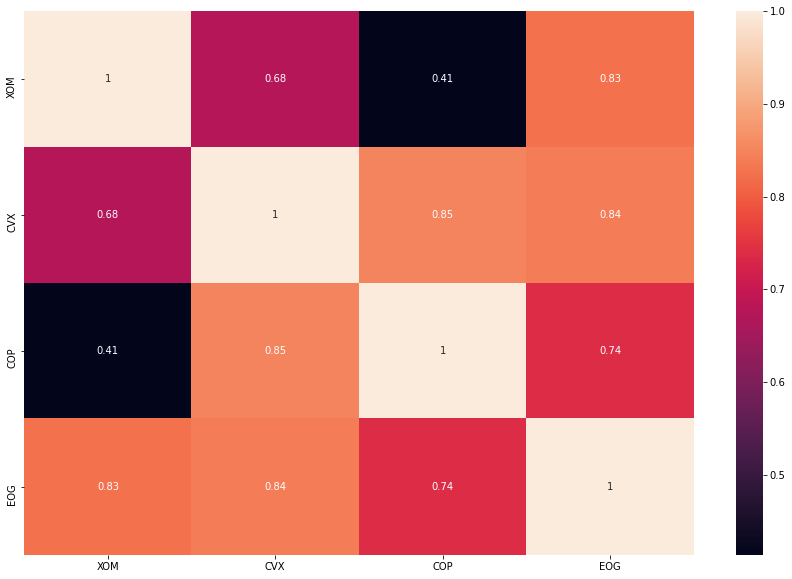

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
data.corr().to_csv('4x4CorrelationMatrix.csv', index=False)

In [7]:
data['t'] = range(1, len(data) + 1)
data.set_index('t',inplace=True)
data.to_csv('OriginalDataset.csv')
data

,Date,XOM,CVX,COP,EOG
t,,,,,
1,1/19/16,76.400002,81.510002,36.400002,60.980000
2,1/20/16,73.180000,78.980003,34.750000,60.240002
3,1/21/16,74.099998,81.050003,36.910000,63.750000
4,1/22/16,76.570000,83.540001,37.669998,66.019997
5,1/25/16,73.980003,80.889999,34.200001,61.590000
...,...,...,...,...,...
1272,2/4/21,48.330002,89.000000,44.009998,57.470001
1273,2/5/21,49.950001,89.260002,44.419998,56.610001
1274,2/8/21,52.099998,91.480003,46.779999,59.410000


In [8]:
data0 = pd.DataFrame(columns=['Date','t','XOM(t)','CVX(t)','COP(t)','EOG(t)'])
data0['Date'] = data['Date'][3:1275]
data0['t'] = range(1, len(data0) + 1)
data0['XOM(t)'] = data['XOM'].iloc[3:1275]
data0['CVX(t)'] = data['CVX'].iloc[3:1275]
data0['COP(t)'] = data['COP'].iloc[3:1275]
data0['EOG(t)'] = data['EOG'].iloc[3:1275]
data0

,Date,t,XOM(t),CVX(t),COP(t),EOG(t)
t,,,,,,
4,1/22/16,1,76.570000,83.540001,37.669998,66.019997
5,1/25/16,2,73.980003,80.889999,34.200001,61.590000
6,1/26/16,3,76.699997,84.120003,35.349998,66.029999
7,1/27/16,4,75.290001,83.290001,36.209999,66.070000
8,1/28/16,5,76.989998,85.919998,38.020000,68.629997
...,...,...,...,...,...,...
1271,2/3/21,1268,47.419998,88.959999,43.209999,55.880001
1272,2/4/21,1269,48.330002,89.000000,44.009998,57.470001
1273,2/5/21,1270,49.950001,89.260002,44.419998,56.610001


In [9]:
data1 = pd.DataFrame(columns=['t','XOM(t-1)','CVX(t-1)','COP(t-1)','EOG(t-1)'])
data1['XOM(t-1)'] = data['XOM'].iloc[2:1274]
data1['CVX(t-1)'] = data['CVX'].iloc[2:1274]
data1['COP(t-1)'] = data['COP'].iloc[2:1274]
data1['EOG(t-1)'] = data['EOG'].iloc[2:1274]
data1['t'] = range(1, len(data1) + 1)
data1

,t,XOM(t-1),CVX(t-1),COP(t-1),EOG(t-1)
t,,,,,
3,1,74.099998,81.050003,36.910000,63.750000
4,2,76.570000,83.540001,37.669998,66.019997
5,3,73.980003,80.889999,34.200001,61.590000
6,4,76.699997,84.120003,35.349998,66.029999
7,5,75.290001,83.290001,36.209999,66.070000
...,...,...,...,...,...
1270,1268,45.630001,87.059998,40.970001,51.259998
1271,1269,47.419998,88.959999,43.209999,55.880001
1272,1270,48.330002,89.000000,44.009998,57.470001


In [10]:
data2 = pd.DataFrame(columns=['t','XOM(t-2)','CVX(t-2)','COP(t-2)','EOG(t-2)'])
data2['XOM(t-2)'] = data['XOM'].iloc[1:1273]
data2['CVX(t-2)'] = data['CVX'].iloc[1:1273]
data2['COP(t-2)'] = data['COP'].iloc[1:1273]
data2['EOG(t-2)'] = data['EOG'].iloc[1:1273]
data2['t'] = range(1, len(data2) + 1)
data2

,t,XOM(t-2),CVX(t-2),COP(t-2),EOG(t-2)
t,,,,,
2,1,73.180000,78.980003,34.750000,60.240002
3,2,74.099998,81.050003,36.910000,63.750000
4,3,76.570000,83.540001,37.669998,66.019997
5,4,73.980003,80.889999,34.200001,61.590000
6,5,76.699997,84.120003,35.349998,66.029999
...,...,...,...,...,...
1269,1268,44.919998,86.410004,40.709999,51.330002
1270,1269,45.630001,87.059998,40.970001,51.259998
1271,1270,47.419998,88.959999,43.209999,55.880001


In [11]:
data3 = pd.DataFrame(columns=['t','XOM(t-3)','CVX(t-3)','COP(t-3)','EOG(t-3)'])
data3['XOM(t-3)'] = data['XOM'].iloc[0:1272]
data3['CVX(t-3)'] = data['CVX'].iloc[0:1272]
data3['COP(t-3)'] = data['COP'].iloc[0:1272]
data3['EOG(t-3)'] = data['EOG'].iloc[0:1272]
data3['t'] = range(1, len(data3) + 1)
data3

,t,XOM(t-3),CVX(t-3),COP(t-3),EOG(t-3)
t,,,,,
1,1,76.400002,81.510002,36.400002,60.980000
2,2,73.180000,78.980003,34.750000,60.240002
3,3,74.099998,81.050003,36.910000,63.750000
4,4,76.570000,83.540001,37.669998,66.019997
5,5,73.980003,80.889999,34.200001,61.590000
...,...,...,...,...,...
1268,1268,44.840000,85.199997,40.029999,50.959999
1269,1269,44.919998,86.410004,40.709999,51.330002
1270,1270,45.630001,87.059998,40.970001,51.259998


In [12]:
data4 = pd.DataFrame(columns=['t','Y(t)'])
data4['Y(t)'] = data['EOG'].iloc[4:1276]
data4['t'] = range(1, len(data4) + 1)
data4   

,t,Y(t)
t,,
5,1,61.590000
6,2,66.029999
7,3,66.070000
8,4,68.629997
9,5,71.019997
...,...,...
1272,1268,57.470001
1273,1269,56.610001
1274,1270,59.410000


In [13]:
data0.set_index('t',inplace=True)
data1.set_index('t',inplace=True)
data2.set_index('t',inplace=True)
data3.set_index('t',inplace=True)
data4.set_index('t',inplace=True)
dataf = pd.concat([data0,data1,data2,data3,data4],axis=1,sort=False).reset_index()
dataf.rename(columns = {'index':'t'})
dataf.to_csv('FinalDataset.csv', index=False)
dataf

,t,Date,XOM(t),CVX(t),COP(t),EOG(t),XOM(t-1),CVX(t-1),COP(t-1),EOG(t-1),XOM(t-2),CVX(t-2),COP(t-2),EOG(t-2),XOM(t-3),CVX(t-3),COP(t-3),EOG(t-3),Y(t)
0,1,1/22/16,76.570000,83.540001,37.669998,66.019997,74.099998,81.050003,36.910000,63.750000,73.180000,78.980003,34.750000,60.240002,76.400002,81.510002,36.400002,60.980000,61.590000
1,2,1/25/16,73.980003,80.889999,34.200001,61.590000,76.570000,83.540001,37.669998,66.019997,74.099998,81.050003,36.910000,63.750000,73.180000,78.980003,34.750000,60.240002,66.029999
2,3,1/26/16,76.699997,84.120003,35.349998,66.029999,73.980003,80.889999,34.200001,61.590000,76.570000,83.540001,37.669998,66.019997,74.099998,81.050003,36.910000,63.750000,66.070000
3,4,1/27/16,75.290001,83.290001,36.209999,66.070000,76.699997,84.120003,35.349998,66.029999,73.980003,80.889999,34.200001,61.590000,76.570000,83.540001,37.669998,66.019997,68.629997
4,5,1/28/16,76.989998,85.919998,38.020000,68.629997,75.290001,83.290001,36.209999,66.070000,76.699997,84.120003,35.349998,66.029999,73.980003,80.889999,34.200001,61.590000,71.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1268,2/3/21,47.419998,88.959999,43.209999,55.880001,45.630001,87.059998,40.970001,51.259998,44.919998,86.410004,40.709999,51.330002,44.840000,85.199997,40.029999,50.959999,57.470001
1268,1269,2/4/21,48.330002,89.000000,44.009998,57.470001,47.419998,88.959999,43.209999,55.880001,45.630001,87.059998,40.970001,51.259998,44.919998,86.410004,40.709999,51.330002,56.610001
1269,1270,2/5/21,49.950001,89.260002,44.419998,56.610001,48.330002,89.000000,44.009998,57.470001,47.419998,88.959999,43.209999,55.880001,45.630001,87.059998,40.970001,51.259998,59.410000
1270,1271,2/8/21,52.099998,91.480003,46.779999,59.410000,49.950001,89.260002,44.419998,56.610001,48.330002,89.000000,44.009998,57.470001,47.419998,88.959999,43.209999,55.880001,58.220001


In [14]:
datafcor = dataf.drop(['t'], axis=1)
datafcor.corr().to_csv('16x16CorrelationMatrix.csv', index=False)
datafcor.corr()

,XOM(t),CVX(t),COP(t),EOG(t),XOM(t-1),CVX(t-1),COP(t-1),EOG(t-1),XOM(t-2),CVX(t-2),COP(t-2),EOG(t-2),XOM(t-3),CVX(t-3),COP(t-3),EOG(t-3),Y(t)
XOM(t),1.000000,0.678412,0.415135,0.826942,0.998029,0.672539,0.411164,0.823871,0.996174,0.667092,0.407421,0.820643,0.994169,0.661347,0.403305,0.817199,0.826390
CVX(t),0.678412,1.000000,0.849185,0.840190,0.676790,0.992080,0.843462,0.837520,0.675802,0.986115,0.838761,0.835187,0.674120,0.978949,0.833058,0.832399,0.836130
COP(t),0.415135,0.849185,1.000000,0.738900,0.414058,0.845619,0.994877,0.737800,0.413193,0.842996,0.990442,0.736825,0.411860,0.839946,0.985644,0.735624,0.733525
EOG(t),0.826942,0.840190,0.738900,1.000000,0.825934,0.835844,0.733722,0.996691,0.825048,0.831884,0.728847,0.993345,0.823916,0.828091,0.723720,0.989816,0.996693
XOM(t-1),0.998029,0.676790,0.414058,0.825934,1.000000,0.677025,0.414671,0.826396,0.998028,0.671021,0.410599,0.823230,0.996162,0.665693,0.406750,0.819986,0.825465
CVX(t-1),0.672539,0.992080,0.845619,0.835844,0.677025,1.000000,0.849478,0.839971,0.675505,0.992087,0.843855,0.837427,0.674197,0.986139,0.838976,0.835056,0.832245
COP(t-1),0.411164,0.843462,0.994877,0.733722,0.414671,0.849478,1.000000,0.739171,0.413644,0.845866,0.994870,0.738117,0.412589,0.843358,0.990469,0.737173,0.728677
EOG(t-1),0.823871,0.837520,0.737800,0.996691,0.826396,0.839971,0.739171,1.000000,0.825436,0.835563,0.733980,0.996683,0.824383,0.831671,0.728993,0.993339,0.993370
XOM(t-2),0.996174,0.675802,0.413193,0.825048,0.998028,0.675505,0.413644,0.825436,1.000000,0.675611,0.414165,0.825810,0.998017,0.669731,0.409995,0.822636,0.824476
CVX(t-2),0.667092,0.986115,0.842996,0.831884,0.671021,0.992087,0.845866,0.835563,0.675611,1.000000,0.849830,0.839825,0.673754,0.992097,0.844023,0.837245,0.828361


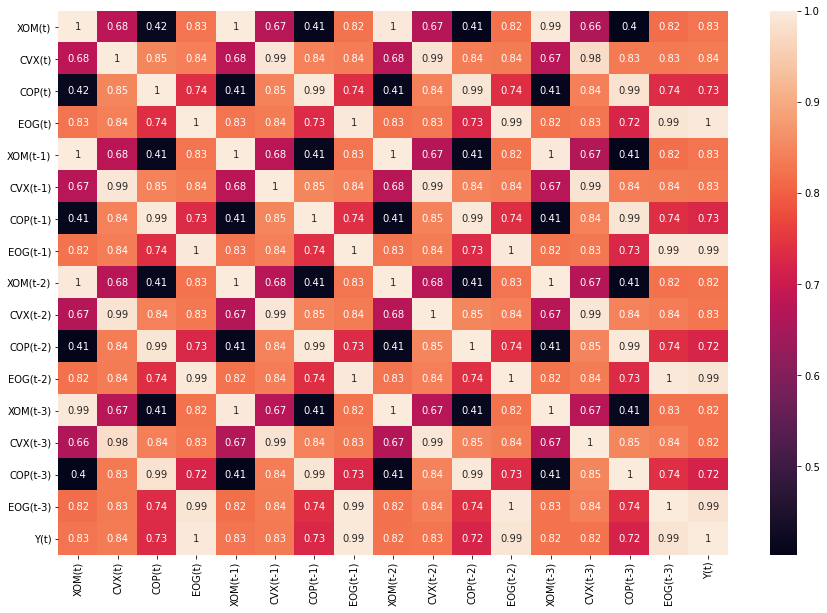

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(datafcor.corr(), annot=True)

In [16]:
dataf
X = dataf.drop(['t', 'Date', 'Y(t)'], axis=1)
X = df.to_numpy(X)
Y = dataf['Y(t)']
Y = df.to_numpy(Y)
Y = Y.reshape((-1,1))
print(Y.shape)
print(Y)
#X

(1272, 1)
[[61.59    ]
 [66.029999]
 [66.07    ]
 ...
 [59.41    ]
 [58.220001]
 [60.209999]]


In [17]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.2, random_state= 0)

In [18]:
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1017, 16) (255, 16) (1017, 1) (255, 1)


In [19]:
scaler = StandardScaler()
## Fit on training set only.
scaler.fit(Xtrain)
# Apply transform to both the training set and the test set.
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [20]:
Xtrain

array([[-0.29282784,  0.50225857,  0.24298548, ...,  0.57238626,
         0.39712193, -0.7121052 ],
       [ 0.43795058, -1.72214461, -1.61713076, ..., -1.83875723,
        -1.30425172, -0.80263005],
       [ 0.38861514,  1.08337765,  1.41509011, ...,  0.97850241,
         1.46905594,  0.46471998],
       ...,
       [-2.20580262, -1.62552133, -1.07905951, ..., -1.7151265 ,
        -1.40972994, -1.86337565],
       [ 0.26157698,  0.78660683,  0.98240537, ...,  0.56064487,
         0.75643413,  0.76618125],
       [ 0.83448269,  1.31044212,  2.3669968 , ...,  1.18017911,
         2.27086249,  1.92914619]])

In [21]:
Ytrain

array([[ 66.769997],
       [ 68.43    ],
       [ 91.349998],
       ...,
       [ 45.459999],
       [111.019997],
       [126.470001]])

In [22]:
X_scaled = np.concatenate((Xtrain, Xtest))
mean_input = X_scaled.mean(axis=0) 
mean_input

array([-0.01961902, -0.00547585, -0.00575651, -0.01567743, -0.0223257 ,
       -0.01095475, -0.00964177, -0.01772533, -0.0214562 , -0.00852785,
       -0.00838669, -0.01751212, -0.02135006, -0.00919023, -0.00993388,
       -0.01849173])

In [23]:
# Make an instance of the Model
pca = PCA(.95)
pca.fit(Xtrain)
#hmin
h95 = pca.n_components_
h95

3

In [24]:
explained_var = []
for i in np.arange(1,4):
  pca = PCA(n_components=i)
  pca.fit(X) 
  explained_var.append(pca.explained_variance_ratio_.cumsum().round(2)) 
explained_var[2]

array([0.84, 0.95, 0.98])

In [25]:
Xtrain.shape
#hmax = math.floor((len(Xtrain.row) - 1) / (len(Xtrain.columns) + 2))

(1017, 16)

In [26]:
#hmax = math.floor((len(Xtrain.rows) - 1) / (len(Xtrain.columns) + 2)) or 18h + 1 <= 1017
hmax = math.floor((1017 - 1) / (16 + 2))
hmax

56

In [27]:
################Test 8
#Build and Compile Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model8 = Sequential()

# Use my own hidden layer size
model8.add(Dense(56, activation='relu', input_shape=(16,)))
model8.add(Dense(1, activation='relu'))

print(model8.summary())

# tune the learning_rate
#model8.compile(optimizer=optimizers.Adam(learning_rate=0.01), loss=losses.MeanSquaredError())

optimizer = optimizers.Adam(learning_rate=0.01)
loss_fn = losses.MeanSquaredError()

model8.compile(optimizer=optimizer,loss=loss_fn)

#Prepare the training set
batch_size = 25

train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, Ytrain))
train_dataset.element_spec

train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
train_dataset.element_spec

list(train_dataset.as_numpy_iterator())[0][1].shape

#train the model8 “manually”
batch_loss = []
gradsNorm = []
epoch_loss = []
val_loss = []
best_val_loss = model8.evaluate(Xtest,Ytest,verbose=0)
#tune `epochs` according to your data
epochs = 5

#best_val_loss

#Writing a training loop from scratch
import timeit
tic=timeit.default_timer()
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_batch_pred = model8(x_batch_train, training=True)
      loss_value = loss_fn(y_batch_train,y_batch_pred)
    grads = tape.gradient(loss_value, model8.trainable_weights)
    gradsNorm.append(   np.sqrt( sum( [ np.sum( np.square(g.numpy()))  for g in grads ] ) )  )
    batch_loss.append(loss_value.numpy())
    optimizer.apply_gradients( zip( grads,model8.trainable_weights ) )
  epoch_loss_value = model8.evaluate(Xtrain,Ytrain,verbose=0)
  epoch_loss.append(epoch_loss_value)

  val_loss_value = model8.evaluate(Xtest,Ytest,verbose=0)
  val_loss.append(val_loss_value)
  print("epoch_loss: %.4f - val_loss:%.4f" %  (float(epoch_loss_value), float(val_loss_value) )    )

  if val_loss_value < best_val_loss:
    best_val_loss=val_loss_value
    model8.save('bestModel8')

toc=timeit.default_timer()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                952       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 57        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________
None

Start of epoch 0
epoch_loss: 2708.4209 - val_loss:2812.1406
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 1
epoch_loss: 770.5676 - val_loss:850.6500
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 2
epoch_loss: 373.6411 - val_loss:420.2599
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 3
epoch_loss: 226.8310 - val_loss:249.9096
INFO:tensorflow:Assets written to: bestModel8/assets

Start of epoch 4
epoch_loss: 171.6718 - val_loss:191.7080
IN

In [28]:
print(toc - tic) #elapsed time in seconds

85.458732854


In [29]:
print(best_val_loss)

2.795560836791992


In [30]:
#Best Model
bestModel8 = tf.keras.models.load_model('bestModel8')
print("\n Model8 val_loss")
model8.evaluate(Xtest,Ytest)
print("\n bestModel8 val_loss")
bestModel8.evaluate(Xtest,Ytest)


 Model8 val_loss
8/8 [==============================] - 0s 2ms/step - loss: 4.8759

 bestModel8 val_loss
8/8 [==============================] - 0s 2ms/step - loss: 2.7956


2.795560836791992

In [31]:
print(math.floor(math.sqrt(len(gradsNorm))))
gradsNorm = [x/ math.floor(math.sqrt(len(gradsNorm))) for x in gradsNorm] 
print(gradsNorm)

78
[2.8533593935575325, 3.6308210377794192, 3.6099600156747305, 5.535036714494503, 7.951123732871078, 6.084341580707183, 7.359606353523925, 8.523702403036541, 8.174389408033932, 7.595436504252396, 9.825610076412843, 11.813942594644734, 11.639736323461678, 11.399437645201125, 8.79029982752551, 11.68310555418219, 12.323782160522589, 12.700507030701896, 12.569448387571075, 11.317386322516207, 12.629513283047077, 12.338351218585347, 15.746655894493623, 16.754681847250847, 11.472514779312897, 17.242488857867457, 17.90063638078699, 11.325730443884169, 9.357030456421048, 19.791150060085283, 12.10496348668942, 12.436401850659964, 15.618630872341887, 17.935856654016863, 21.344153998814548, 14.942243700895741, 16.608835028940252, 18.56231433984807, 17.55459555046534, 11.948689926381594, 18.623621732844033, 10.256254365176451, 17.368803530080957, 15.895986536689238, 11.929967081971048, 16.201789826578022, 11.266490439853696, 11.713938099234236, 13.819992619650753, 13.762637344174165, 10.082518433

In [32]:
gradsNorm[0:10]

[2.8533593935575325,
 3.6308210377794192,
 3.6099600156747305,
 5.535036714494503,
 7.951123732871078,
 6.084341580707183,
 7.359606353523925,
 8.523702403036541,
 8.174389408033932,
 7.595436504252396]

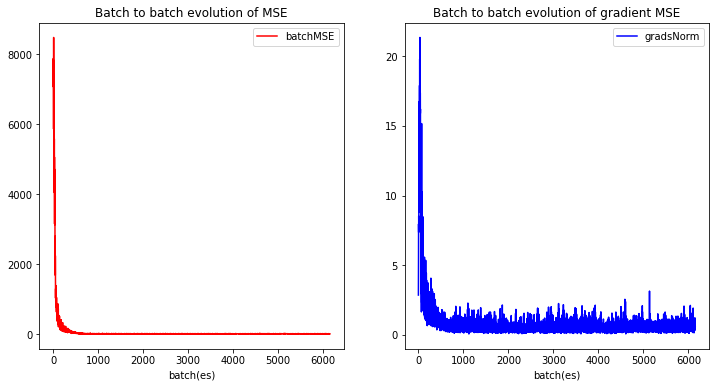

<Figure size 432x288 with 0 Axes>

In [33]:
#create batch MSE, batch gradNorms
batch_df8 = pd.DataFrame(list(zip(gradsNorm, batch_loss)), columns = ["gradsNorm", "batchMSE"])
batch_df8.index.name = "Batch No."
batch_df8.head(10)

#plot
plt.subplot(1,2,1)
batch_df8['batchMSE'].plot(label = "batchMSE", color = "r", figsize = (12,6))
plt.title ("Batch to batch evolution of MSE")
plt.xlabel("batch(es)")

plt.legend()

plt.subplot(1,2,2)
batch_df8['gradsNorm'].plot(label = "gradsNorm", color = "b", figsize = (12,6))
plt.title ("Batch to batch evolution of gradient MSE")
plt.xlabel("batch(es)")
plt.legend()

plt.show()
plt.tight_layout()

In [34]:
val_loss

[2812.140625,
 850.6499633789062,
 420.2598571777344,
 249.90963745117188,
 191.70797729492188,
 151.34445190429688,
 129.0903778076172,
 95.54010772705078,
 77.81340026855469,
 60.011478424072266,
 48.06889724731445,
 33.629173278808594,
 25.125930786132812,
 18.427204132080078,
 13.784041404724121,
 10.136462211608887,
 7.817936420440674,
 6.863191604614258,
 6.438202381134033,
 9.249732971191406,
 5.150493621826172,
 4.886865615844727,
 5.2804179191589355,
 4.713796615600586,
 6.672732353210449,
 4.62926721572876,
 4.671252727508545,
 4.672601699829102,
 5.681962490081787,
 4.353020668029785,
 4.115353584289551,
 6.842965126037598,
 4.704294681549072,
 3.618276596069336,
 4.0411376953125,
 5.591817378997803,
 3.8285391330718994,
 5.503999710083008,
 4.313447952270508,
 5.382269859313965,
 4.397564888000488,
 4.135263442993164,
 4.151460647583008,
 4.4733147621154785,
 4.7265238761901855,
 4.371361255645752,
 3.862370014190674,
 3.706411361694336,
 3.5681543350219727,
 4.024316310882

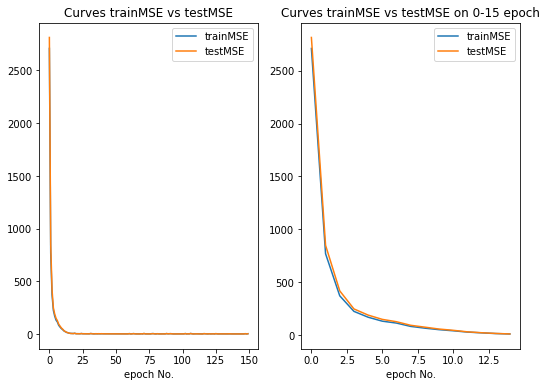

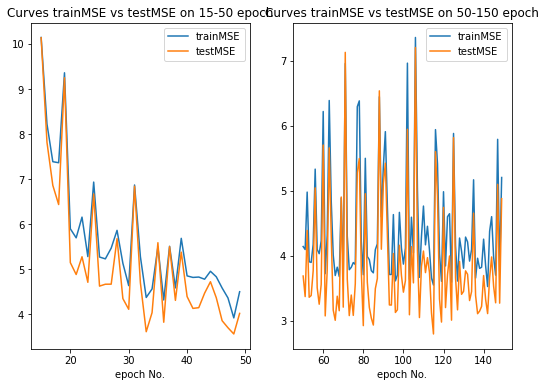

In [35]:
#create epoch train and test MSE
epoch_df8 = pd.DataFrame(list(zip(epoch_loss, val_loss)), columns = ["trainMSE", "testMSE"])
epoch_df8.to_csv('TrainTestMSE56.csv', index=False)
epoch_df8.index.name = "epoch No."
#epoch_df8.head(10)

#plot
plt.subplot(1,4,1)
epoch_df8['trainMSE'].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE")
plt.xlabel("epoch No.")
plt.legend()

plt.subplot(1,4,2)
epoch_df8['trainMSE'].iloc[0:15,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[0:15,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 0-15 epoch")
plt.xlabel("epoch No.")
plt.legend()
plt.show() 

plt.subplot(1,4,3)
epoch_df8['trainMSE'].iloc[15:50,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[15:50,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 15-50 epoch")
plt.xlabel("epoch No.")
plt.legend()

plt.subplot(1,4,4)
epoch_df8['trainMSE'].iloc[50:,].plot(label = "trainMSE", figsize = (18,6))
epoch_df8['testMSE'].iloc[50:,].plot(label = "testMSE")
plt.title ("Curves trainMSE vs testMSE on 50-150 epoch")
plt.xlabel("epoch No.")
plt.legend()

plt.show()
#plt.tight_layout()

In [36]:
#access hidden layer activity
#use bestModel.layers[0] as a function.


bestModel8.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 56)                952       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 57        
Total params: 1,009
Trainable params: 1,009
Non-trainable params: 0
_________________________________________________________________


In [37]:
bestModel8.layers[0]

In [38]:
av_j = np.mean(bestModel8.layers[0](X).numpy(), axis = 0)

In [39]:
bestModel8.layers[0](X).numpy().shape

(1272, 56)

In [40]:
predd = bestModel8.predict(Xtest)
#Ytest
#predd

     EOG actualPrice$ EOG predictedPrice$
time                                     
1         [37.450001]          [36.75531]
2             [50.52]           [49.7569]
3              [96.5]          [97.43695]
4         [87.040001]          [88.78351]
5         [90.300003]         [91.147064]
...               ...                 ...
251      [100.449997]          [99.35663]
252       [49.419998]         [49.378105]
253       [79.339996]          [80.41003]
254      [101.660004]         [101.25743]
255       [99.199997]          [99.25782]

[255 rows x 2 columns]
      EOG actualPrice$  EOG predictedPrice$
time                                       
1            37.450001            36.755310
2            50.520000            49.756901
3            96.500000            97.436951
4            87.040001            88.783508
5            90.300003            91.147064
...                ...                  ...
251         100.449997            99.356628
252          49.419998            

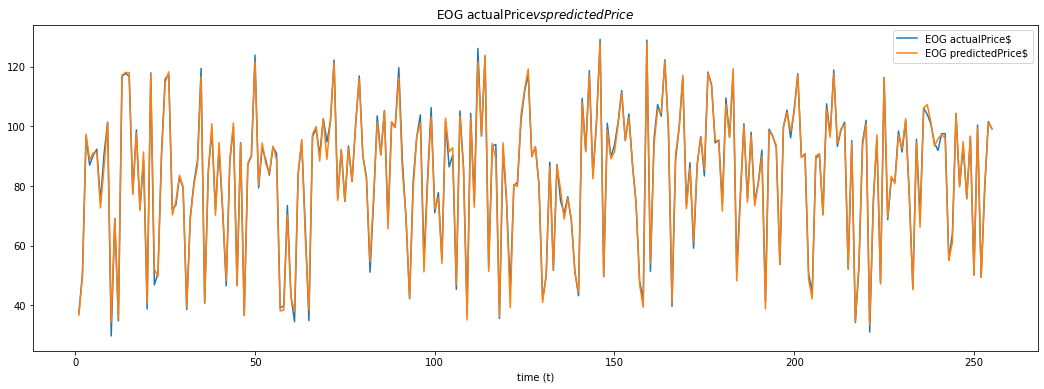

In [41]:
#create epoch train and test MSE
Ytest_predd = pd.DataFrame(list(zip(Ytest, predd)), columns = ["EOG actualPrice$", "EOG predictedPrice$"])
Ytest_predd.index += 1 
Ytest_predd.index.name = "time"
print(Ytest_predd)
#Ytest_predd.head(10)

#plot
Ytest_predd=Ytest_predd.astype(float)
#Ytest_predd.to_csv('ActualPredictedPricet.csv', index=False)
print(Ytest_predd)
Ytest_predd['EOG actualPrice$'].plot(label = "EOG actualPrice$", figsize = (18,6))
Ytest_predd['EOG predictedPrice$'].plot(label = "EOG predictedPrice$")
plt.title ("EOG actualPrice$ vs predictedPrice$")
plt.xlabel("time (t)")
plt.legend()
plt.show()

In [42]:
diff1 = ((Ytest_predd["EOG actualPrice$"] - Ytest_predd["EOG predictedPrice$"]).abs()/Ytest_predd["EOG actualPrice$"])*100
print(diff1.max())
print(diff1)
diff1.to_csv('ERRt.csv', index=False)
Ytest_predd['Percentage Error%'] = diff1
print(Ytest_predd)

15.432393166326703
time
1      1.854982
2      1.510489
3      0.970933
4      2.003110
5      0.938052
         ...   
251    1.088470
252    0.084769
253    1.348665
254    0.395999
255    0.058289
Length: 255, dtype: float64
      EOG actualPrice$  EOG predictedPrice$  Percentage Error%
time                                                          
1            37.450001            36.755310           1.854982
2            50.520000            49.756901           1.510489
3            96.500000            97.436951           0.970933
4            87.040001            88.783508           2.003110
5            90.300003            91.147064           0.938052
...                ...                  ...                ...
251         100.449997            99.356628           1.088470
252          49.419998            49.378105           0.084769
253          79.339996            80.410027           1.348665
254         101.660004           101.257431           0.395999
255          99.

In [48]:
Ytest_predd.to_dict('index')

{1: {'EOG actualPrice$': 37.450001,
  'EOG predictedPrice$': 36.75531005859375,
  'Percentage Error%': 1.8549824375338475},
 2: {'EOG actualPrice$': 50.52,
  'EOG predictedPrice$': 49.756900787353516,
  'Percentage Error%': 1.510489336196531},
 3: {'EOG actualPrice$': 96.5,
  'EOG predictedPrice$': 97.43695068359375,
  'Percentage Error%': 0.9709333508743524},
 4: {'EOG actualPrice$': 87.040001,
  'EOG predictedPrice$': 88.78350830078125,
  'Percentage Error%': 2.0031103868912483},
 5: {'EOG actualPrice$': 90.300003,
  'EOG predictedPrice$': 91.14706420898438,
  'Percentage Error%': 0.938052248995353},
 6: {'EOG actualPrice$': 92.370003,
  'EOG predictedPrice$': 91.34561920166016,
  'Percentage Error%': 1.1090005034857915},
 7: {'EOG actualPrice$': 74.790001,
  'EOG predictedPrice$': 72.6891098022461,
  'Percentage Error%': 2.8090535762312796},
 8: {'EOG actualPrice$': 90.610001,
  'EOG predictedPrice$': 86.2194595336914,
  'Percentage Error%': 4.845537377610879},
 9: {'EOG actualPrice

In [ ]:
# Creating FastAPI instance
app = FastAPI()

# Creating class to define the request body and the type hints of each attribute
class request_body(BaseModel):
    name_stock : str

# Result fucntion to return results
def result():
    return Ytest_predd.to_dict('index')

# Defining path operation for root endpoint
@app.get('/')
def root():
    return {'message': 'Welcome to Oil & Gas Stock Analysis!'}
  
# Defining path operation for /action endpoint
@app.get('/{action}')
def root_action(action : str): 
    # Defining a function that takes only string as input and output the following message
    return {'message': f'From different Oil and Gas companies stock prices, {action} EOG stock prices'}

# Creating an Endpoint to receive the data to make prediction on
@app.post('/predict')
async def predict(data: request_body):

    # Return the Result
    return result()

# routes to get the result
@app.get("/predict/EOG")
async def display():
    return result()

ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL: http://6795df6141fd.ngrok.io


INFO:     Started server process [181]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2601:2c0:4700:39e6:1d85:3164:3323:8da4:0 - "GET / HTTP/1.1" 200 OK
INFO:     2601:2c0:4700:39e6:1d85:3164:3323:8da4:0 - "GET /favicon.ico HTTP/1.1" 200 OK
